Progress: [##############################] 1000 of 1000 samples
[[1.24215405 1.70963051]
 [1.24215405 1.70963051]
 [0.58671086 0.96505756]
 ...
 [1.07617413 1.18769224]
 [1.15367191 1.55451378]
 [0.92479148 1.40091124]]


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


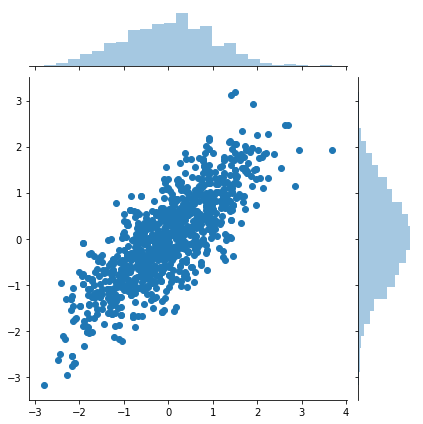

In [11]:
import sampyl as smp
import numpy as np
import seaborn

icov = np.linalg.inv(np.array([[1., .8], [.8, 1.]]))
y = 0

def logp(x):
    return (-0.5*np.dot(np.dot(x, icov),x) + y)


start = {'x':np.ones(2)}
nuts = smp.NUTS(logp, start)
chain = nuts.sample(1000)

print (chain.x)
seaborn.jointplot(chain.x[:,0], chain.x[:,1], stat_func = None)

In [10]:
help(smp.NUTS)

Help on class NUTS in module sampyl.samplers.NUTS:

class NUTS(sampyl.samplers.base.Sampler)
 |  No-U-Turn sampler (Hoffman & Gelman, 2014) for sampling from a
 |  probability distribution defined by a log P(theta) function.
 |  
 |  For technical details, see the paper:
 |  http://www.stat.columbia.edu/~gelman/research/published/nuts.pdf
 |  
 |  :param logp: log P(X) function for sampling distribution
 |  :param start: 
 |      Dictionary of starting state for the sampler. Should have one
 |      element for each argument of logp.
 |  :param grad_logp: (optional)
 |      Function or list of functions that calculate grad log P(theta). 
 |      Pass functions here if you don't want to use autograd for the 
 |      gradients. If logp has multiple parameters, grad_logp must be 
 |      a list of gradient functions w.r.t. each parameter in logp.
 |  
 |      If you wish to use a logp function that returns both the logp
 |      value and the gradient, set grad_logp = True.
 |  :param scale